# Evaluate SatRain retrievals

This notebook evaluates SatRain ML retrievals across all testing datasets.

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from typing import Tuple

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

## ERA5 Data

In [13]:
from satrain.input import Ancillary
anc = Ancillary(variables=["total_precipitation"])

def retrieve_era5(input_data: xr.Dataset) -> xr.Dataset:
    """
    Retrieval callback function to load GPROF data corresponding to IPWGML SPR evaluation data.

    Args:
        input_data: An xarray.Dataset containing the retrieval input data.

    Return:
        An xarray.Dataset containing the retrieval results.
    """
    return xr.Dataset({
        "surface_precip": 1e3 * input_data[{"features_ancillary": 0}].ancillary
    })

## Evaluation

In [14]:
from satrain.evaluation import Evaluator
from satrain.target import TargetConfig

for domain in ["austria", "conus", "korea"]:
    evaluator = Evaluator(
        domain=domain,
        base_sensor="gmi",
        geometry="gridded",
        retrieval_input=[{"name": "ancillary", "variables": ["total_precipitation"]}]
    )
    evaluator.evaluate(retrieve_era5, n_processes=8)
    results = evaluator.get_results()
    results.to_netcdf(f'results_era5_{domain}.nc')

Output()

Output()

Output()

In [69]:
from satrain.evaluation import Evaluator
evaluator = Evaluator(
    domain="austria",
    base_sensor="atms",
    geometry="on_swath",
    retrieval_input=[{"name": "atms"}]
)
data = evaluator.get_input_data(28)


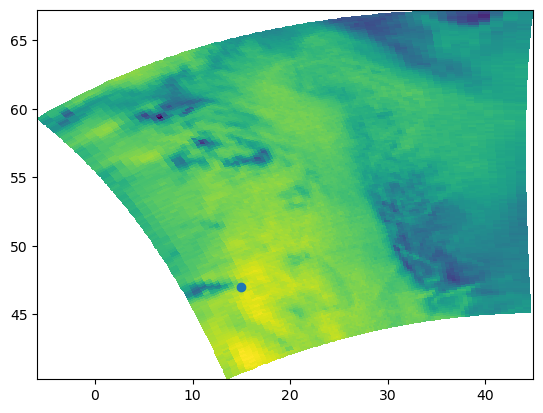

In [70]:
lons = data.longitude
lats = data.latitude
plt.pcolormesh(lons, lats, data.obs_atms[4])
plt.scatter(15, 47)